# 電気抵抗計算：グリューナイゼンの式  

フォノンによる電気抵抗（グリューナイゼンの式）は、下記のように表されます。  

　　$\rho (T) = C \bigl( \frac{T}{\Theta_D} \bigr)^5 \int_{0}^{\Theta_D /T} \frac{x^5}{(e^x - 1)(1 - e^x)} dx$  
  
この計算をJuliaですると、以下のようになります。

  0.000193 seconds (114 allocations: 36.484 KiB)


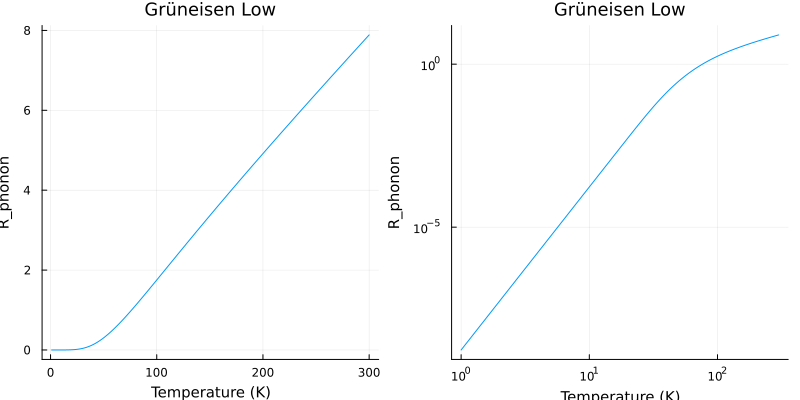

In [1]:
using Plots
using QuadGK

#//---------- 図の描画のための関数 ----------//
function DataPlot(xwave, ywave, titlename)
    Plots.reset_defaults()
    Plots.gr(
        titlefont=Plots.font("sans-serif", 12),
        legendfont=Plots.font("sans-serif", 8),
        guidefont=Plots.font("sans-serif", 10),
        tickfont=Plots.font("sans-serif", 8),
    )
    Plots.plot(size=(400, 400))
    p1 = Plots.plot(xwave, ywave,
        xscale = :identity, yscale = :identity,
        seriestype=:line, title=titlename, legend=false
    )
    p2 = Plots.plot(xwave, ywave,
        xscale = :log10, yscale = :log10,
        seriestype=:line, title=titlename, legend=false
    )
    Plots.plot(p1,p2,layout=(1,2),size=(800,400))
    Plots.plot!(ylabel="R_phonon")
    Plots.plot!(xlabel="Temperature (K)")
end

#//---------- グリューナイゼンの式の計算をする関数 ----------//
function ResistivityCalc()
    
    DT = 300 # デバイ温度。
    C = 10000 # 適当な定数。
    
    #温度の設定
    temp = collect(1:1:300)
    #グリューナイゼンの式の計算
    f(x) = x^5/((exp(x)-1)*(1-exp(-x))) #積分する式の定義
    intpart1 = quadgk.(f, 0, DT./temp) #積分部分の実行
    intpart2 = [intpart1[i][1] for i in 1:length(intpart1)] #TupleをArrayに変換とか
    calcR = (C/DT)*((temp./DT).^5).*intpart2

    return temp, calcR
end

#//---------- 計算の実行 ----------//
@time temp, calcR = ResistivityCalc()

#//---------- 図の描画とデータ保存 ----------//
DataPlot(temp, calcR, "Grüneisen Low")

In [2]:
using CSV, DataFrames
function saveData2(xwave, y1wave, filename::String)
    df = DataFrame(temp = xwave, resistivity = y1wave);
    df |> CSV.write(filename)
end

saveData2(temp, calcR, "GruneisenR.csv")

"GruneisenR.csv"